In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
from datetime import datetime, time

In [47]:
# Import Data
trades = pd.read_csv("PXA.X 20250115 Stocks Trades.csv")
print(trades.shape)

(4574, 22)


In [51]:
# Preprocessing Steps

# Extracting time component only
trades['Date-Time'] = pd.to_datetime(trades['Date-Time'])
trades['Time'] = trades['Date-Time'].dt.time

# Filter trades by time
start_time = time(10, 10, 0)  # 10:10:00 AM
end_time = time(16, 0, 0)     # 16:00:00 PM
filtered_df = trades[trades['Time'] >= start_time]
filtered_df = filtered_df[filtered_df["Time"] <= end_time]

# Value Traded
filtered_df["Value Traded"] = filtered_df["Price"] * filtered_df["Volume"]

# VWAP
filtered_df["Cumulative Value Traded"] = filtered_df["Value Traded"].cumsum()
filtered_df["Cumulative Volume"] = filtered_df["Volume"].cumsum()
filtered_df["Cumulative VWAP"] = filtered_df["Cumulative Value Traded"] / filtered_df["Cumulative Volume"]


filtered_df.head(10)

,#RIC,Alias Underlying RIC,Domain,Date-Time,Type,Price,Volume,Market VWAP,Buyer ID,Bid Price,...,Tick Dir.,Open,High,Low,Turnover,Time,Value Traded,Cumulative Value Traded,Cumulative Volume,Cumulative VWAP
50,PXA.AX,NaN,Market Price,2025-01-15 10:11:15.760473307+11:00,Trade,12.90,14.0,12.739960,NaN,12.86,...,^,12.74,12.90,12.7,12714.48,10:11:15.760473,180.60,180.60,14.0,12.900000
51,PXA.CHA,NaN,Market Price,2025-01-15 10:11:21.484570847+11:00,Trade,12.90,23.0,12.900000,NaN,12.87,...,^,12.90,12.90,12.9,297.00,10:11:21.484570,296.70,477.30,37.0,12.900000
52,PXA.CHA,NaN,Market Price,2025-01-15 10:11:21.484570847+11:00,Trade,12.90,24.0,12.900000,NaN,12.87,...,,12.90,12.90,12.9,606.00,10:11:21.484570,309.60,786.90,61.0,12.900000
53,PXA.CHA,NaN,Market Price,2025-01-15 10:11:21.484570847+11:00,Trade,12.90,10.0,12.900000,NaN,12.87,...,,12.90,12.90,12.9,735.00,10:11:21.484570,129.00,915.90,71.0,12.900000
54,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.485555418+11:00,Trade,12.91,50.0,12.748073,NaN,12.87,...,^,12.74,12.91,12.7,13359.98,10:11:21.485555,645.50,1561.40,121.0,12.904132
55,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.485555418+11:00,Trade,12.91,120.0,12.764709,NaN,12.87,...,^,12.74,12.91,12.7,14909.18,10:11:21.485555,1549.20,3110.60,241.0,12.907054
56,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.485555418+11:00,Trade,12.91,38.0,12.769287,NaN,12.87,...,^,12.74,12.91,12.7,15399.76,10:11:21.485555,490.58,3601.18,279.0,12.907455
57,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.485555418+11:00,Trade,12.91,18.0,12.771356,NaN,12.87,...,^,12.74,12.91,12.7,15632.14,10:11:21.485555,232.38,3833.56,297.0,12.907609
58,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.485555418+11:00,Trade,12.91,5.0,12.771920,NaN,12.89,...,^,12.74,12.91,12.7,15696.69,10:11:21.485555,64.55,3898.11,302.0,12.907649
59,PXA.AX,NaN,Market Price,2025-01-15 10:11:21.490417892+11:00,Trade,12.91,2.0,12.772145,NaN,12.89,...,^,12.74,12.91,12.7,15722.51,10:11:21.490417,25.82,3923.93,304.0,12.907664


In [49]:
trades.value_counts("#RIC")

#RIC
PXA.AX     3355
PXA.CHA    1219
Name: count, dtype: int64

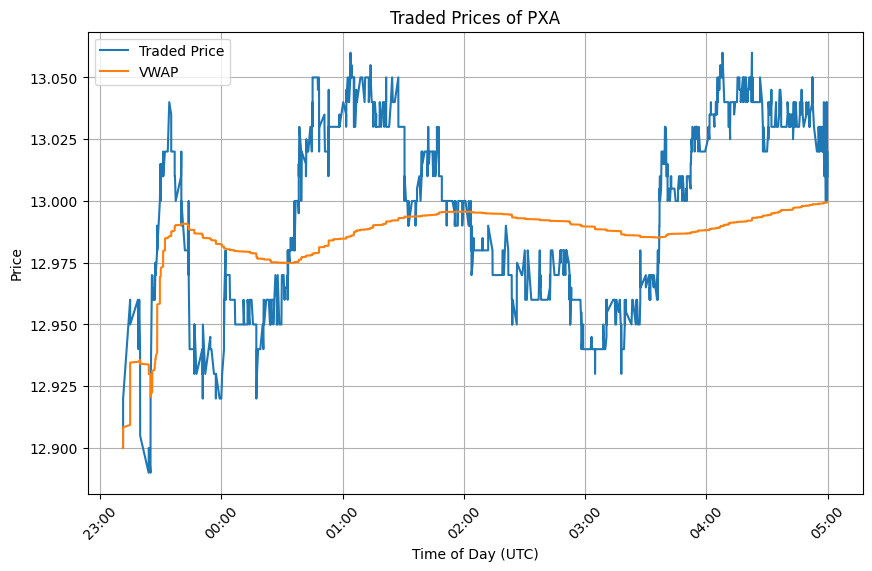

In [57]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))
plt.plot(filtered_df['Date-Time'], filtered_df['Price'], label = "Traded Price");
plt.plot(filtered_df['Date-Time'], filtered_df['Cumulative VWAP'], label = "VWAP");

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as HH:MM
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour

plt.xticks(rotation=45)
plt.xlabel("Time of Day (UTC)")
plt.ylabel("Price")

plt.grid(True)
plt.legend()

plt.title("Traded Prices of PXA");

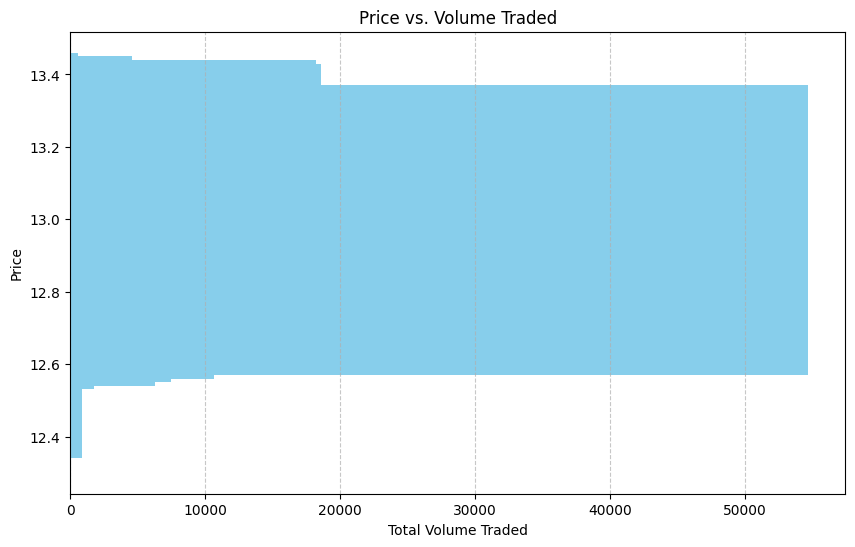

In [55]:
# Aggregate total volume for each price
price_volume = trades.groupby("Price")["Volume"].sum().reset_index()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(price_volume["Price"], price_volume["Volume"], color='skyblue')

# Labels and title
plt.xlabel("Total Volume Traded")
plt.ylabel("Price")
plt.title("Price vs. Volume Traded")
plt.grid(axis="x", linestyle="--", alpha=0.7)